In [ ]:
# Clear training data set
# !rm -rf musical_instruments

# Save training data set as a .zip file for download
# !zip -r /content/musical_instruments.zip /content/musical_instruments

In [1]:
# Dependency installation
!pip install -Uqq duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.9 MB/s eta 0:00:00


---
# Musical Instrument Classifier (MIC) Model Training
---

**TL;DR:** Despite class imbalance (e.g., more acoustic drum set samples) and visual overlap between instruments, the model maintained `~87.38%` accuracy across 47 instrument types with minimal confusion.

---

**Notes:**
*   The **Musical Instrument Classifier (MIC)** is a computer vision and machine learning model designed to recognize a wide variety of commonly used musical instruments based on image input.
*   Used `DuckDuckGo` API to gather commonly used instrument images, such as:
  * **Stringed instruments**
      * `acoustic guitar, classical guitar, electric guitar, acoustic bass guitar, electric bass guitar, violin, viola, cello, double bass, harp, ukelele, banjo, mandolin`
  * **Keyboard instruments**
      * `piano, electric keyboard, synthesizer, organ, accordion`
  * **Brass instruments**
      * `trumpet, trombone, french horn, tuba, euphonium`
  * **Woodwind Instruments**
      * `flute, clarinet, saxophone, oboe, bassoon, piccolo`
  * **Percussion Instruments**
      * `acoustic drum set, electric drum set, snare drum, bass drum, cymbals, tambourine, bongo drums, congas, xylophone, marimba, triangle`
  * **Miscellaneous instruments**
      * `microphone, DJ controller, theremin, electric violin, keytar, multiple-necked guitar, otamatone`
*   `fast.ai` API for learning and differentiating the instruments.
*   Provided a trained model: `musical_instrument_classifier.pkl`.
  * Based on the pre-trained and lightweight `resnet18` CNN model.
  * The training data currently involves about `300-400 samples` for each listed instrument. The model is fine-tuned `10 times`.
  * Model performance:
      * **Training loss factor ≈** `0.04479`
      * **Validation loss factor ≈** `0.53766`
      * **Error rate ≈** `12.62%`
      * **Normalized Confusion Matrix Plot**
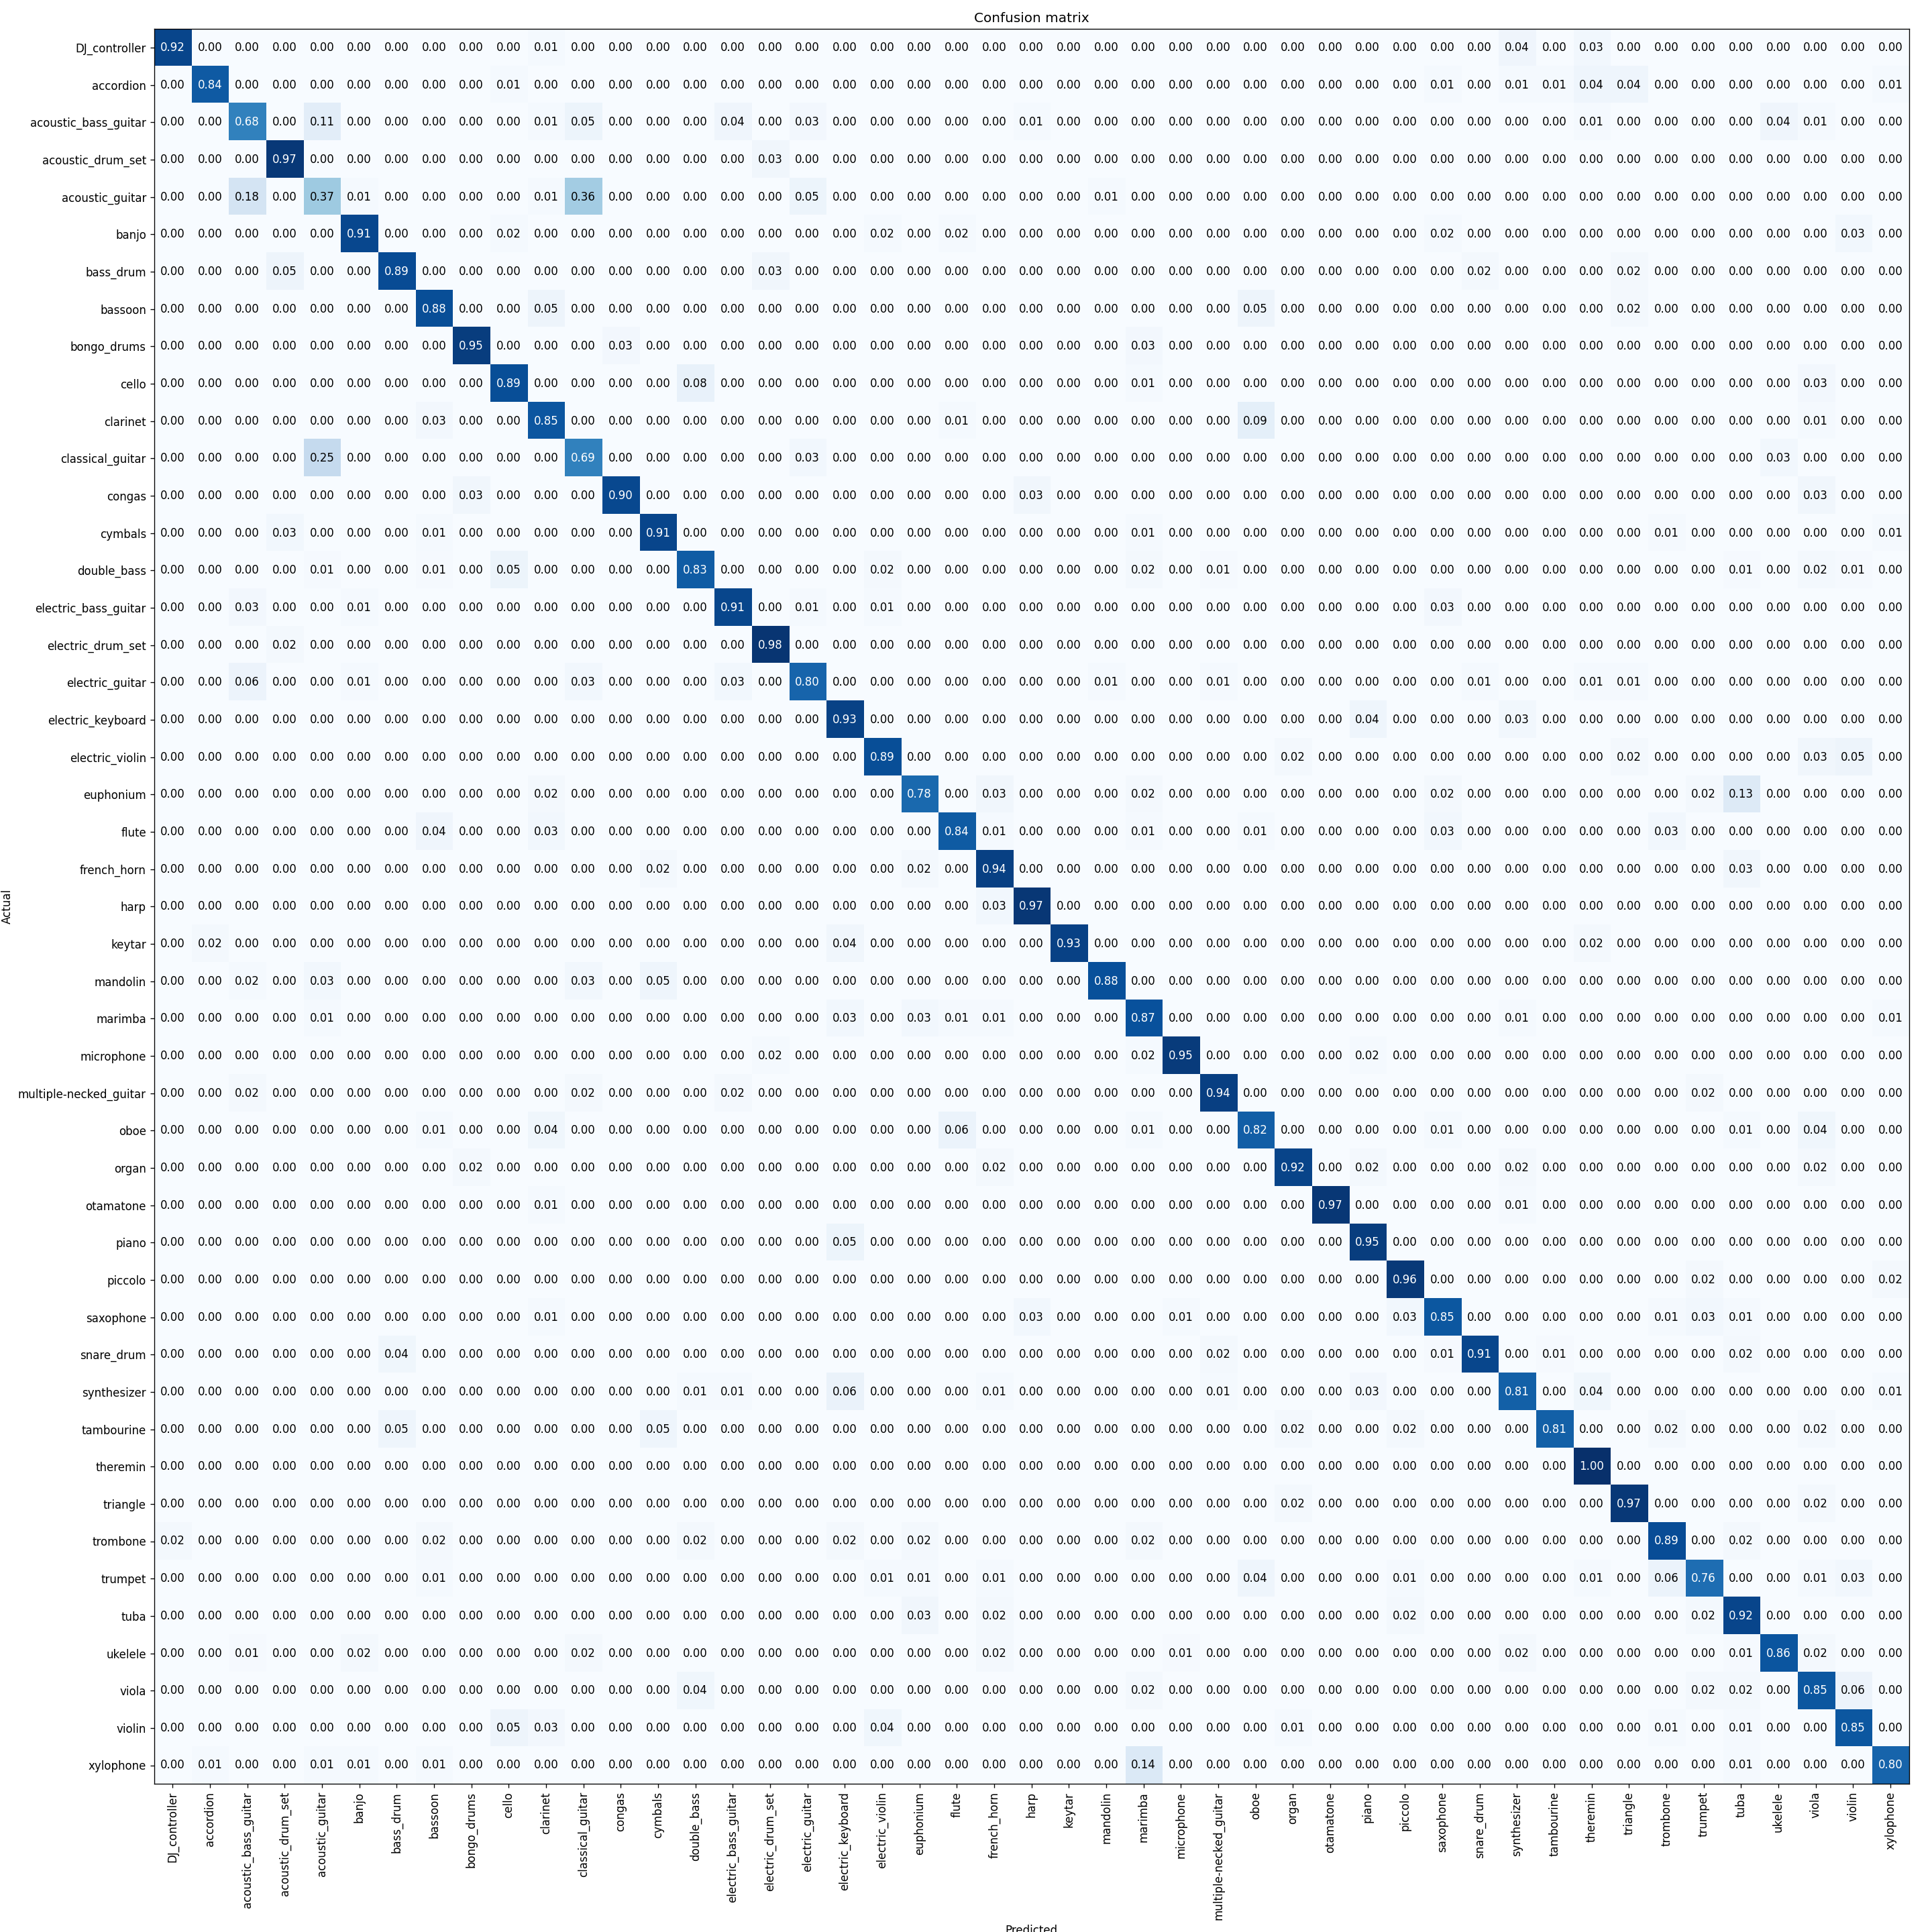
---
***Note:*** The model performs well across a wide range of musical instruments, but identifying unconventional or unlisted instruments may lead to inconsistent results. To improve reliability, it iss recommended to expand the training dataset and include more varied examples — especially for niche or uncommon instruments.

While overall accuracy was strong, some rare or visually complex instruments led to overconfident misclassifications. For instance, a flamed-top HSH guitar was incorrectly identified as a multiple-necked guitar. This suggests that training with more visual variety — or using a deeper architecture like `resnet34` or `resnet50` — could help improve performance in such cases.

One class, `acoustic_drum_set`, had about `900 images`, compared to `300 - 400 images` for most other classes. This imbalance was due to ***DuckDuckGo's rate limits*** during dataset collection. Despite this, the ***confusion matrix analysis*** shows that the model performed reliably overall, with no major bias toward the overrepresented class.

The normalized confusion matrix shows a clear diagonal pattern, indicating accurate predictions across most classes. Some mild confusion occurred between similar-looking instruments — such as `acoustic vs. classical guitars`, and `xylophone vs. marimba` — which is expected given their visual resemblance in photos.

---

In [2]:
from duckduckgo_search import DDGS # DuckDuckGo has changed the API so we need to update
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [3]:
from re import search
from fastdownload import download_url
from fastai.vision.all import *
import random

# Save each group of instrument photos to a different folder; add more instrument categories as needed
# Includes at least 200 images for each instrument category per model training.
# Perform a manual separate musical instrument image search to avoid rate-limits.
search_stringed = 'acoustic_guitar', 'classical_guitar', 'electric_guitar', 'acoustic_bass_guitar', 'electric_bass_guitar', 'violin', 'viola', 'cello', 'double_bass', 'harp', 'ukelele', 'banjo', 'mandolin'
search_keyboard = 'piano', 'electric_keyboard', 'synthesizer', 'organ', 'accordion'
search_brass = 'trumpet', 'trombone', 'french_horn', 'tuba', 'euphonium'
search_woodwind = 'flute', 'clarinet', 'saxophone', 'oboe', 'bassoon', 'piccolo'
search_percussion = 'acoustic_drum_set', 'electric_drum_set', 'snare_drum', 'bass_drum', 'cymbals', 'tambourine', 'bongo_drums', 'congas', 'xylophone', 'marimba', 'triangle'
search_misc = 'microphone', 'DJ_controller', 'theremin', 'electric_violin', 'keytar', 'multiple-necked_guitar', 'otamatone'

# Categorize each instrument types for further visualization and grouping when necessary
instrument_categories = {
    'stringed': [search_stringed],
    'keyboard': [search_keyboard],
    'brass': [search_brass],
    'woodwind': [search_woodwind],
    'percussion': [search_percussion],
    'misc': [search_misc]
}

path = Path('musical_instruments')

In [ ]:
# Stringed Instruments: Image File Gathering
for name in search_stringed:
    dest = (path/name)
    dest.mkdir(parents=True, exist_ok=True)

    # Skip if already has 200 or more images
    existing_imgs = list(dest.glob('*'))
    if len(existing_imgs) >= 200:
        print(f"Skipping {name}. It already has {len(existing_imgs)} images for training.")
        continue
    try:
        print(f"Searching for: {name}")
        urls = search_images(f'{name} photo', max_images=200)
        download_images(dest, urls=urls)
        print(f"Downloaded images for: {name}")
    except Exception as e:
        print(f"Error downloading {name}: {e}")
        continue  # Skip to next instrument

    time.sleep(random.uniform(4, 8))

    for f in (path/name).ls():
        if f.suffix.lower() == '.heic':
            f.unlink()  # Delete .heic images as Pillow (PIL) does not support it by default

    resize_images(path/name, max_size=400, dest=path/name)

Skipping acoustic_guitar. It already has 376 images for training.
Skipping classical_guitar. It already has 377 images for training.
Skipping electric_guitar. It already has 377 images for training.
Skipping acoustic_bass_guitar. It already has 375 images for training.
Skipping electric_bass_guitar. It already has 379 images for training.
Skipping violin. It already has 374 images for training.
Skipping viola. It already has 363 images for training.
Skipping cello. It already has 385 images for training.
Skipping double_bass. It already has 367 images for training.
Skipping harp. It already has 372 images for training.
Skipping ukelele. It already has 370 images for training.
Skipping banjo. It already has 372 images for training.
Skipping mandolin. It already has 357 images for training.


In [ ]:
# Keyboard Instruments: Image File Gathering
for name in search_keyboard:
    dest = (path/name)
    dest.mkdir(exist_ok=True, parents=True)

    # Skip if already has 200 or more images
    existing_imgs = list(dest.glob('*'))
    if len(existing_imgs) >= 200:
        print(f"Skipping {name}. It already has {len(existing_imgs)} images for training.")
        continue
    try:
        print(f"Searching for: {name}")
        urls = search_images(f'{name} photo', max_images=200)
        download_images(dest, urls=urls)
        print(f"Downloaded images for: {name}")
    except Exception as e:
        print(f"Error downloading {name}: {e}")
        continue  # Skip to next instrument

    time.sleep(random.uniform(4, 8))

    for f in (path/name).ls():
        if f.suffix.lower() == '.heic':
            f.unlink()  # Delete .heic images as Pillow (PIL) does not support it by default

    resize_images(path/name, max_size=400, dest=path/name)

Skipping piano. It already has 346 images for training.
Skipping electric_keyboard. It already has 381 images for training.
Skipping synthesizer. It already has 371 images for training.
Skipping organ. It already has 358 images for training.
Skipping accordion. It already has 355 images for training.


In [ ]:
# Brass Instruments: Image File Gathering
for name in search_brass:
    dest = (path/name)
    dest.mkdir(exist_ok=True, parents=True)

    # Skip if already has 200 or more images
    existing_imgs = list(dest.glob('*'))
    if len(existing_imgs) >= 200:
        print(f"Skipping {name}. It already has {len(existing_imgs)} images for training.")
        continue
    try:
        print(f"Searching for: {name}")
        urls = search_images(f'{name} photo', max_images=200)
        download_images(dest, urls=urls)
        print(f"Downloaded images for: {name}")
    except Exception as e:
        print(f"Error downloading {name}: {e}")
        continue  # Skip to next instrument

    time.sleep(random.uniform(4, 8))

    for f in (path/name).ls():
        if f.suffix.lower() == '.heic':
            f.unlink()  # Delete .heic images as Pillow (PIL) does not support it by default

    resize_images(path/name, max_size=400, dest=path/name)

Skipping trumpet. It already has 373 images for training.
Skipping trombone. It already has 383 images for training.
Skipping french_horn. It already has 355 images for training.
Skipping tuba. It already has 366 images for training.
Skipping euphonium. It already has 356 images for training.


In [ ]:
# Woodwind Instruments: Image File Gathering
for name in search_woodwind:
    dest = (path/name)
    dest.mkdir(exist_ok=True, parents=True)

    # Skip if already has 200 or more images
    existing_imgs = list(dest.glob('*'))
    if len(existing_imgs) >= 200:
        print(f"Skipping {name}. It already has {len(existing_imgs)} images for training.")
        continue
    try:
        print(f"Searching for: {name}")
        urls = search_images(f'{name} photo', max_images=200)
        download_images(dest, urls=urls)
        print(f"Downloaded images for: {name}")
    except Exception as e:
        print(f"Error downloading {name}: {e}")
        continue  # Skip to next instrument

    time.sleep(random.uniform(4, 8))

    for f in (path/name).ls():
        if f.suffix.lower() == '.heic':
            f.unlink()  # Delete .heic images as Pillow (PIL) does not support it by default

    resize_images(path/name, max_size=400, dest=path/name)

Skipping flute. It already has 377 images for training.
Skipping clarinet. It already has 386 images for training.
Skipping saxophone. It already has 357 images for training.
Skipping oboe. It already has 372 images for training.
Skipping bassoon. It already has 367 images for training.
Skipping piccolo. It already has 331 images for training.


In [ ]:
# Percussion Instruments: Image File Gathering
for name in search_percussion:
    dest = (path/name)
    dest.mkdir(exist_ok=True, parents=True)

    # Skip if already has 200 or more images
    existing_imgs = list(dest.glob('*'))
    if len(existing_imgs) >= 200:
        print(f"Skipping {name}. It already has {len(existing_imgs)} images for training.")
        continue
    try:
        print(f"Searching for: {name}")
        urls = search_images(f'{name} photo', max_images=200)
        download_images(dest, urls=urls)
        print(f"Downloaded images for: {name}")
    except Exception as e:
        print(f"Error downloading {name}: {e}")
        continue  # Skip to next instrument

    time.sleep(random.uniform(4, 8))

    for f in (path/name).ls():
        if f.suffix.lower() == '.heic':
            f.unlink()  # Delete .heic images as Pillow (PIL) does not support it by default

    resize_images(path/name, max_size=400, dest=path/name)

Skipping acoustic_drum_set. It already has 959 images for training.
Skipping electric_drum_set. It already has 773 images for training.
Skipping snare_drum. It already has 547 images for training.
Skipping bass_drum. It already has 367 images for training.
Skipping cymbals. It already has 363 images for training.
Skipping tambourine. It already has 223 images for training.
Skipping bongo_drums. It already has 387 images for training.
Skipping congas. It already has 297 images for training.
Skipping xylophone. It already has 367 images for training.
Skipping marimba. It already has 363 images for training.
Skipping triangle. It already has 356 images for training.


In [ ]:
# Miscellaneous Instruments: Image File Gathering
for name in search_misc:
    dest = (path/name)
    dest.mkdir(exist_ok=True, parents=True)

    # Skip if already has 200 or more images
    existing_imgs = list(dest.glob('*'))
    if len(existing_imgs) >= 200:
        print(f"Skipping {name}. It already has {len(existing_imgs)} images for training.")
        continue
    try:
        print(f"Searching for: {name}")
        urls = search_images(f'{name} photo', max_images=200)
        download_images(dest, urls=urls)
        print(f"Downloaded images for: {name}")
    except Exception as e:
        print(f"Error downloading {name}: {e}")
        continue  # Skip to next instrument

    time.sleep(random.uniform(4, 8))

    for f in (path/name).ls():
        if f.suffix.lower() == '.heic':
            f.unlink()  # Delete .heic images as Pillow (PIL) does not support it by default

    resize_images(path/name, max_size=400, dest=path/name)

Skipping microphone. It already has 363 images for training.
Skipping DJ_controller. It already has 320 images for training.
Skipping theremin. It already has 320 images for training.
Skipping electric_violin. It already has 374 images for training.
Skipping keytar. It already has 335 images for training.
Skipping multiple-necked_guitar. It already has 333 images for training.
Skipping otamatone. It already has 378 images for training.


In [ ]:
# Some photos might not download correctly which could cause our model training to fail, so we'll remove them.
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

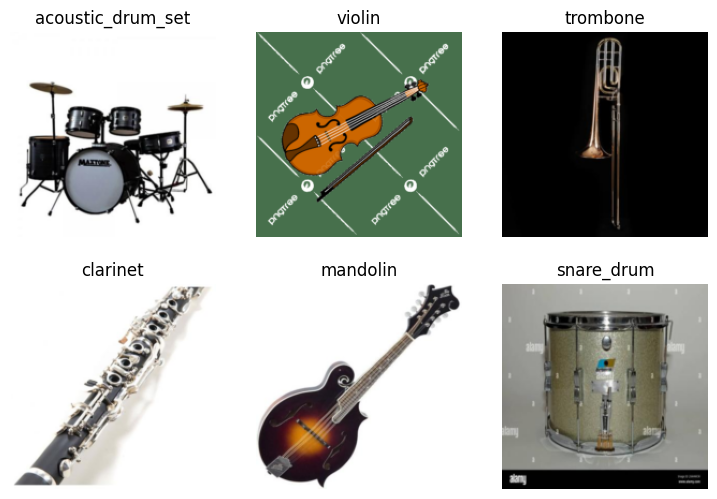

In [ ]:
# To train a model, we'll need DataLoaders, which is an object that contains a training set
# (the images used to create a model) and a validation set (the images used to check the
# accuracy of a model -- not used during training). In fastai, we can create that easily
# using a DataBlock, and view sample images from it.

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # The inputs to our model are images, and the outputs are categories
    get_items=get_image_files, # To find all the inputs to our model, run the get_image_files function (which returns a list of all image files in a path).
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Split the data into training and validation sets randomly, using 20% of the data for the validation set.
    get_y=parent_label, # The labels (y values) is the name of the parent of each file
    item_tfms=[Resize(192, method='squish')] # Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
# Use resnet18 pre-trained model for vision learning and fine-tuning.
# Replace the pre-trained model as needed.
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.658423,1.179929,0.323350,35:26


epoch,train_loss,valid_loss,error_rate,time
0,1.066652,0.759358,0.223612,52:38
1,0.772787,0.629245,0.182030,53:54
2,0.566724,0.655414,0.171561,51:31
3,0.360013,0.600330,0.155568,52:38
4,0.257323,0.601715,0.145682,51:32


epoch,train_loss,valid_loss,error_rate,time
0,1.066652,0.759358,0.223612,52:38
1,0.772787,0.629245,0.182030,53:54
2,0.566724,0.655414,0.171561,51:31
3,0.360013,0.600330,0.155568,52:38
4,0.257323,0.601715,0.145682,51:32
5,0.185371,0.606630,0.140157,50:52
6,0.125708,0.549892,0.132015,48:44
7,0.090446,0.562498,0.129689,48:51
8,0.062475,0.536656,0.126199,48:54
9,0.044787,0.537656,0.126199,48:35


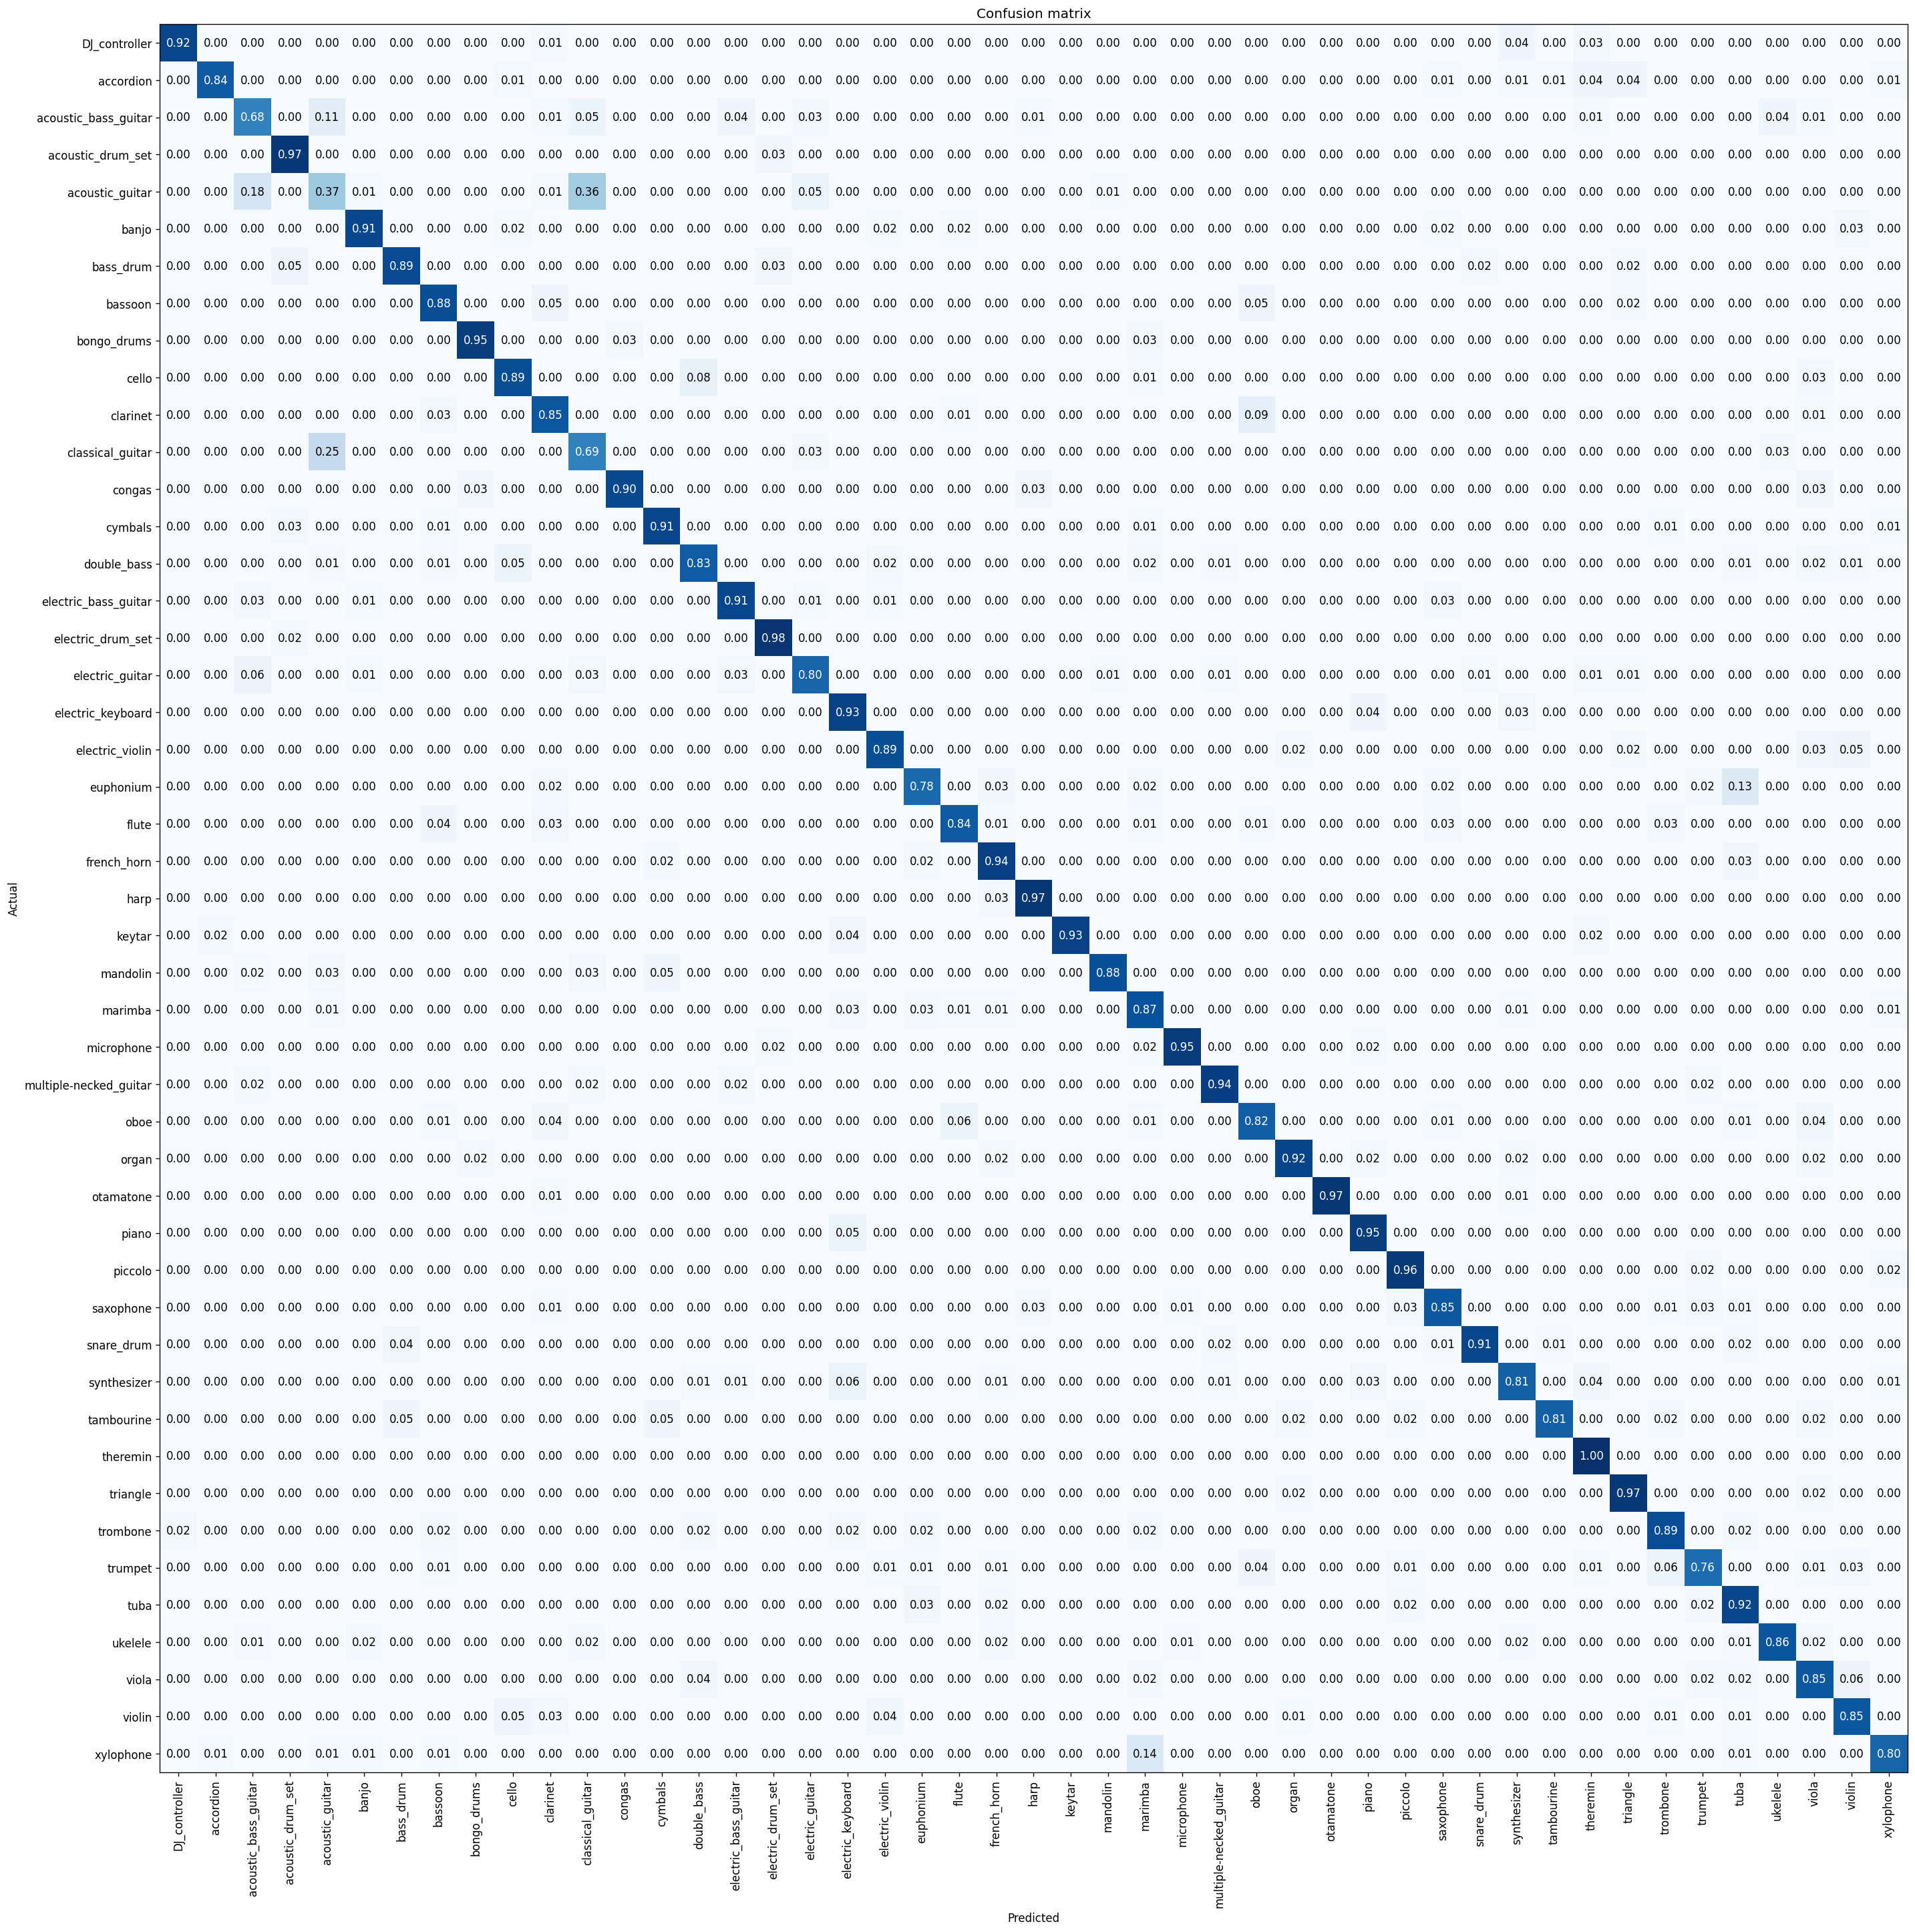

In [ ]:
# Perform confusion matrix analysis to determine the accuracy
# per class, identify confused pairs, and the impact of
# imbalance in classes on the model.
from fastai.vision.all import *
from fastai.interpret import ClassificationInterpretation

# Generate the interpretation object
interp = ClassificationInterpretation.from_learner(learn)

# Plot the normalized confusion matrix
interp.plot_confusion_matrix(figsize=(24,24), dpi=120, normalize=True)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.savefig('confusion_matrix.png')

In [ ]:
interp.most_confused(min_val=10)

[('acoustic_guitar', 'classical_guitar', np.int64(28)),
 ('classical_guitar', 'acoustic_guitar', np.int64(17)),
 ('acoustic_guitar', 'acoustic_bass_guitar', np.int64(14)),
 ('xylophone', 'marimba', np.int64(11))]

In [ ]:
# Export the fine-tuned model
learn.export('musical_instrument_classifier_resnet18.pkl')

---
# MIC Model Tester
---
*   Use the drag-and-drop functionality to upload and identify a musical instrument.
*   The model tester will indicate the most likely identification of the instrument and its other possible classification with corresponding probabilities.
---



FileUpload(value={}, accept='.png,.jpg,.jpeg,.webp', description='Upload')

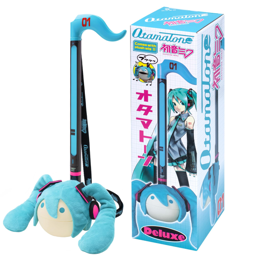

-------------------------------------
This is an otamatone with 100.0% confidence.

Top 3 Predictions:
1. otamatone — 100.0%
2. electric violin — 0.0%
3. tambourine — 0.0%


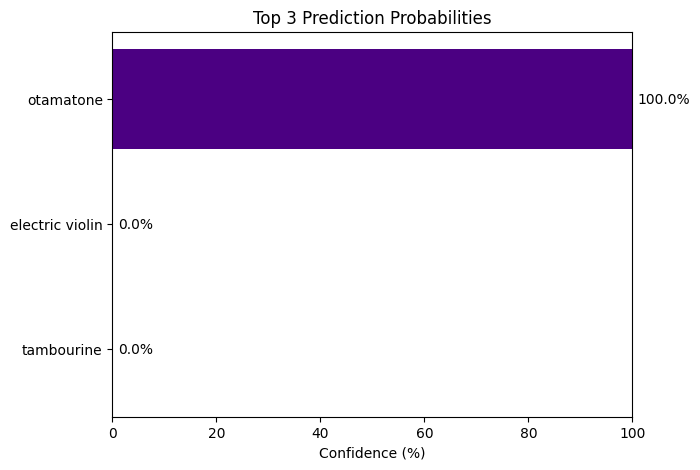

-------------------------------------


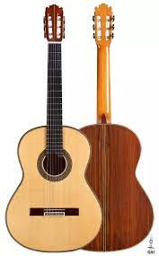

-------------------------------------
This is a classical guitar with 98.2% confidence.

Top 3 Predictions:
1. classical guitar — 98.2%
2. acoustic guitar — 1.6%
3. acoustic bass guitar — 0.2%


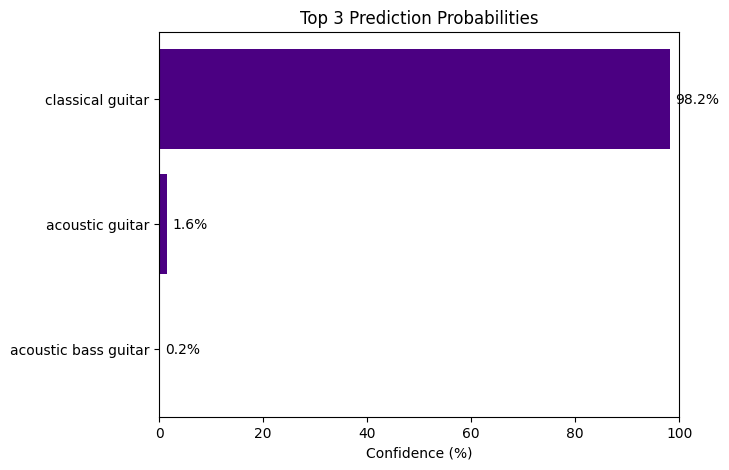

-------------------------------------


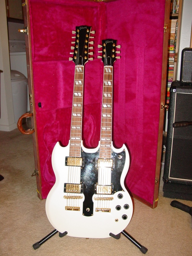

-------------------------------------
This is a multiple-necked guitar with 100.0% confidence.

Top 3 Predictions:
1. multiple-necked guitar — 100.0%
2. electric guitar — 0.0%
3. bass drum — 0.0%


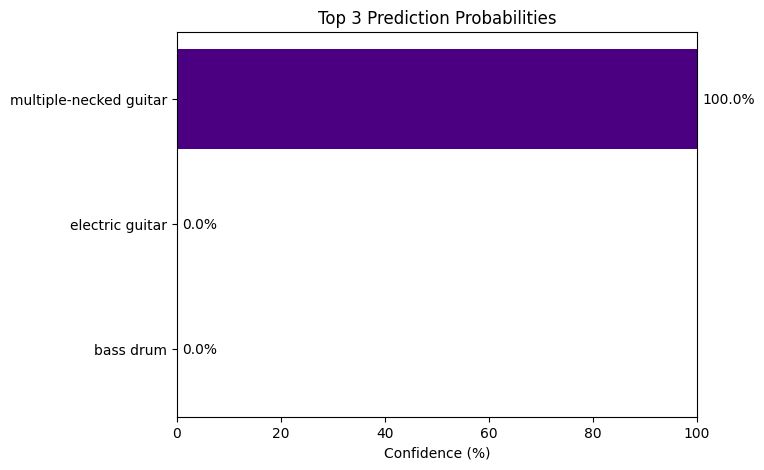

-------------------------------------


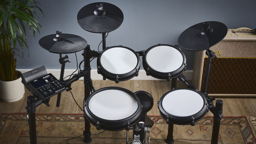

-------------------------------------
This is an electric drum set with 99.7% confidence.

Top 3 Predictions:
1. electric drum set — 99.7%
2. acoustic drum set — 0.3%
3. bass drum — 0.0%


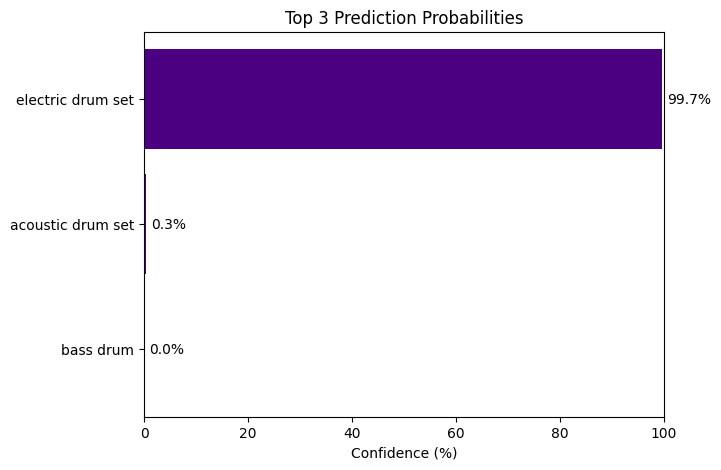

-------------------------------------


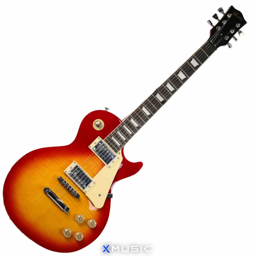

-------------------------------------
This is an electric guitar with 75.3% confidence.

Top 3 Predictions:
1. electric guitar — 75.3%
2. acoustic bass guitar — 24.5%
3. electric bass guitar — 0.1%


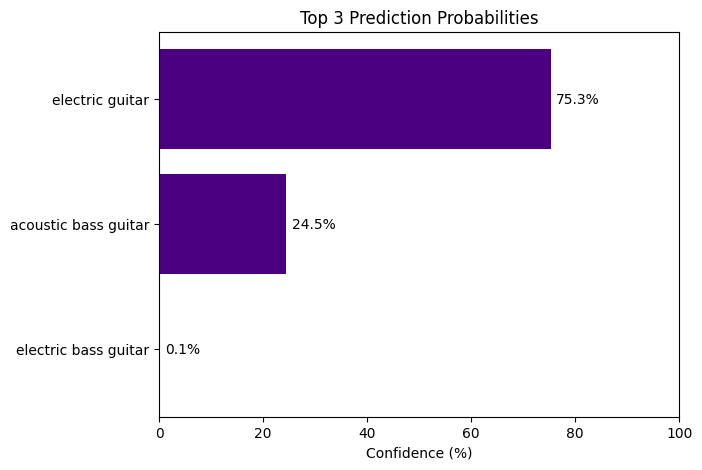

-------------------------------------


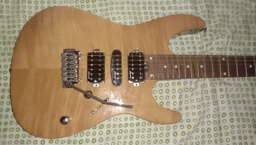

-------------------------------------
This is a multiple-necked guitar with 55.3% confidence.

Top 3 Predictions:
1. multiple-necked guitar — 55.3%
2. acoustic bass guitar — 11.9%
3. classical guitar — 10.3%


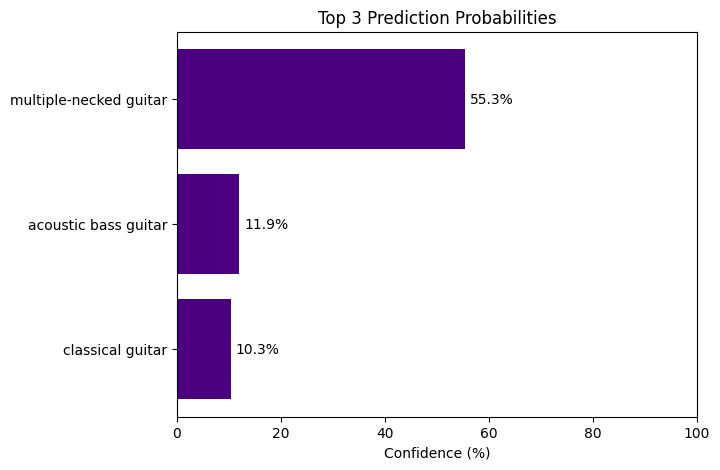

-------------------------------------


In [ ]:
from google.colab import files
import ipywidgets as widgets
from IPython.display import display
from fastai.vision.all import *
import PIL
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="fastai.learner")

# Load trained MIC model
learn = load_learner('musical_instrument_classifier_resnet18.pkl')

# Upload widget
upload_button = widgets.FileUpload(accept='.png,.jpg,.jpeg,.webp', multiple=False)
display(upload_button)

# Prediction handler
def on_upload(change):
    for fname, file_info in upload_button.value.items():
        # Save uploaded image
        with open(fname, 'wb') as f:
            f.write(file_info['content'])

        # Show image
        display(PIL.Image.open(fname).to_thumb(256, 256))

        # Run prediction
        pred_class, pred_idx, probs = learn.predict(fname)

        # Convert class list and probs to a sorted top-3 list
        classes = learn.dls.vocab
        top_3 = sorted(
                  [(cls, probs[i].item()) for i, cls in enumerate(classes)],
                  key=lambda x: x[1],
                  reverse=True
                )[:3]

        # Display top-1 natural language output
        print("-------------------------------------")
        best_class, best_prob = top_3[0]
        article = 'an' if best_class[0].lower() in 'aeiou' else 'a'
        print(f"This is {article} {best_class.replace('_', ' ')} with {best_prob * 100:.1f}% confidence.")

        # Print top-3 ranked list
        print("\nTop 3 Predictions:")
        for i, (cls, prob) in enumerate(top_3, 1):
            print(f"{i}. {cls.replace('_', ' ')} — {prob * 100:.1f}%")

        # Plot bar chart
        labels = [cls.replace('_', ' ') for cls, _ in top_3]
        values = [prob * 100 for _, prob in top_3]

        plt.figure(figsize=(8, 5))
        bars = plt.barh(labels[::-1], values[::-1], color='indigo')
        plt.xlabel('Confidence (%)')
        plt.title('Top 3 Prediction Probabilities')
        plt.xlim(0, 100)
        for bar, val in zip(bars, values[::-1]):
            plt.text(val + 1, bar.get_y() + bar.get_height()/2, f"{val:.1f}%", va='center')
        plt.subplots_adjust(left=0.3, right=0.95)
        plt.show()
        print("-------------------------------------")

# Attach the event handler
upload_button.observe(on_upload, names='value')